In [1]:
import pandas as pd
import numpy as  np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Design1a_Para2_S21.csv")

In [3]:
data

,Freq [GHz],"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='1mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='2mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='3mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='4mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='5mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='1mm' s2='1mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='2mm' s2='1mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='3mm' s2='1mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='0mm' g2='0mm' s1='4mm' s2='1mm'",...,"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='1mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='2mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='3mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='1mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='2mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='3mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='2mm'"
0,1.0,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-0.680799,-0.890213,-1.001806,-1.162021,-1.399727,-0.773223,-1.028858,-1.145530,-1.295512,-1.712422
1,1.1,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-0.845104,-1.111187,-1.264132,-1.481307,-1.801839,-0.956926,-1.278987,-1.436946,-1.641933,-2.179723
2,1.2,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-1.034539,-1.369147,-1.576040,-1.868085,-2.297861,-1.167445,-1.568240,-1.779575,-2.057079,-2.744214
3,1.3,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-1.252251,-1.669585,-1.946740,-2.337269,-2.911946,-1.407813,-1.901746,-2.181853,-2.554778,-3.427390
4,1.4,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-1.501954,-2.019084,-2.387668,-2.908003,-3.676443,-1.681577,-2.285596,-2.654119,-3.152574,-4.257601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19.6,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-0.111982,-0.745604,-3.840237,-14.145785,-4.052525,-0.339645,-1.882012,-0.990868,-0.939139,-0.074768
187,19.7,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-0.122965,-0.982599,-0.097208,-20.280597,-1.298253,-0.379687,-12.386174,-0.785210,-1.664051,-0.079466
188,19.8,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-0.221881,-1.375285,-2.386360,-3.103160,-0.278496,-0.561133,-0.383659,-1.398534,-3.167465,-0.270965
189,19.9,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-0.392193,-2.373335,-0.522719,-8.823352,-0.063454,-0.564289,-0.237429,-2.228234,-21.069916,-0.604613


In [4]:
def clean_data(data):
    data=data.replace([-np.inf], np.nan)
    data=data.dropna(axis=1, how='all')
    data.isnull().to_numpy().any()
    return data

In [5]:
def input_parameters(data):
    output=np.empty((0,4), float)
    for columns in data.columns[1:]:
        params=columns.split(' ')[3:]
        param=[]
        for vals in params:
            param.append(float(vals.split('=')[1][1:-3]))
        param=np.array([param])
        output=np.concatenate((output, param), axis=0)
    return output

In [6]:
data = clean_data(data)
X = input_parameters(data)

In [7]:
X

array([[ 2. ,  0. ,  1. ,  0.5],
       [ 2. ,  0. ,  2. ,  0.5],
       [ 2. ,  0. ,  3. ,  0.5],
       ...,
       [10. ,  2. ,  3. ,  2. ],
       [10. ,  2. ,  4. ,  2. ],
       [10. ,  2. ,  5. ,  2. ]])

In [8]:
data

,Freq [GHz],"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='1mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='2mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='3mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='4mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='5mm' s2='0.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='1mm' s2='1mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='2mm' s2='1mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='3mm' s2='1mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='2mm' g2='0mm' s1='4mm' s2='1mm'",...,"dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='1mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='2mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='3mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='1.5mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='1mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='2mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='3mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='4mm' s2='2mm'","dB(S(FloquetPort2:1,FloquetPort1:1)) [] - g1='10mm' g2='2mm' s1='5mm' s2='2mm'"
0,1.0,-26.899047,-21.738253,-18.556836,-16.289351,-14.415687,-28.692293,-24.515156,-20.904366,-18.596905,...,-0.680799,-0.890213,-1.001806,-1.162021,-1.399727,-0.773223,-1.028858,-1.145530,-1.295512,-1.712422
1,1.1,-26.068833,-20.907403,-17.723808,-15.450868,-13.571228,-27.861928,-23.682070,-20.068625,-17.755122,...,-0.845104,-1.111187,-1.264132,-1.481307,-1.801839,-0.956926,-1.278987,-1.436946,-1.641933,-2.179723
2,1.2,-25.310477,-20.148358,-16.962408,-14.683555,-12.797495,-27.103407,-22.920569,-19.304227,-16.984126,...,-1.034539,-1.369147,-1.576040,-1.868085,-2.297861,-1.167445,-1.568240,-1.779575,-2.057079,-2.744214
3,1.3,-24.612427,-19.449567,-16.261093,-13.975885,-12.083003,-26.405176,-22.219100,-18.599619,-16.272372,...,-1.252251,-1.669585,-1.946740,-2.337269,-2.911946,-1.407813,-1.901746,-2.181853,-2.554778,-3.427390
4,1.4,-23.965701,-18.802051,-15.610893,-13.318908,-11.418845,-25.758255,-21.568683,-17.945826,-15.610891,...,-1.501954,-2.019084,-2.387668,-2.908003,-3.676443,-1.681577,-2.285596,-2.654119,-3.152574,-4.257601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,19.6,-0.321875,-1.548532,-7.952840,-21.568599,-18.472182,-0.438480,-2.745812,-8.696332,-18.056836,...,-0.111982,-0.745604,-3.840237,-14.145785,-4.052525,-0.339645,-1.882012,-0.990868,-0.939139,-0.074768
187,19.7,-0.293934,-1.631440,-8.234867,-17.505902,-14.123273,-0.407896,-2.893401,-8.938881,-13.469784,...,-0.122965,-0.982599,-0.097208,-20.280597,-1.298253,-0.379687,-12.386174,-0.785210,-1.664051,-0.079466
188,19.8,-0.266269,-1.725217,-8.533635,-13.911005,-5.799198,-0.378492,-3.047005,-9.193498,-8.276319,...,-0.221881,-1.375285,-2.386360,-3.103160,-0.278496,-0.561133,-0.383659,-1.398534,-3.167465,-0.270965
189,19.9,-0.239161,-1.830872,-8.848792,-10.397368,-16.825132,-0.350309,-3.206147,-9.460411,-2.353985,...,-0.392193,-2.373335,-0.522719,-8.823352,-0.063454,-0.564289,-0.237429,-2.228234,-21.069916,-0.604613


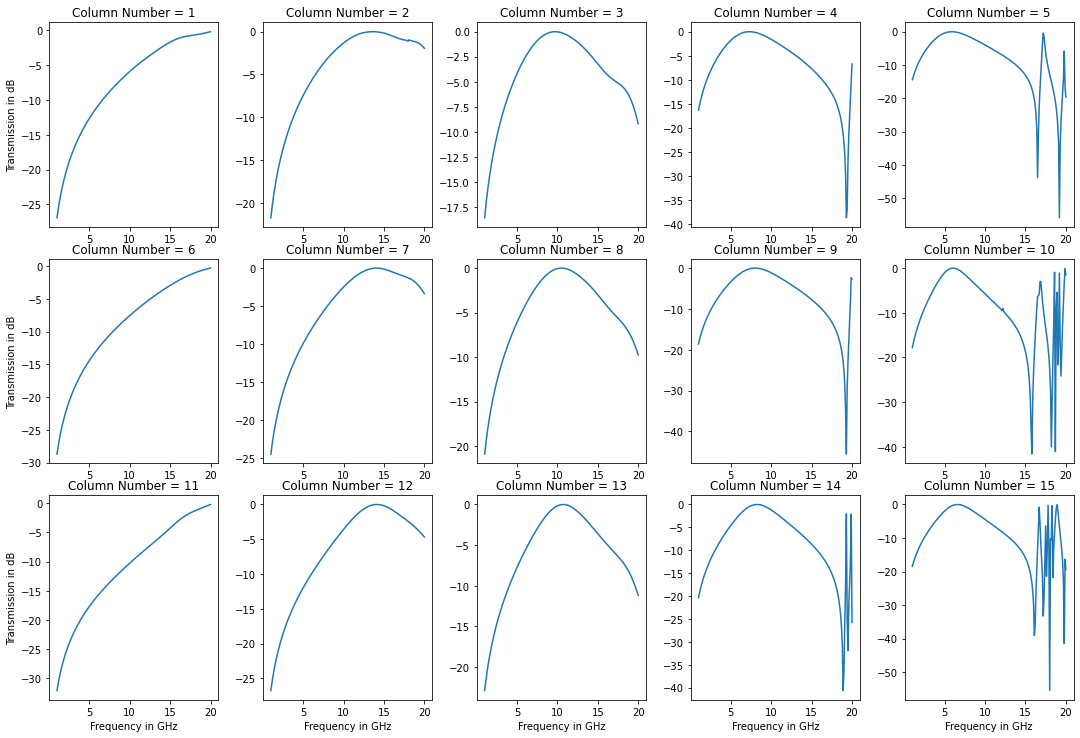

In [9]:
rows=3
columns=5
fig, window =  plt.subplots(rows, columns, figsize=(15,10))
fig.tight_layout()
for x in range(0,rows):
    for y in range(0, columns):
        index=1+x*columns+y
        window[x][y].title.set_text("Column Number = %d" % index)
        window[x][y].plot(data.iloc[:, 0], data.iloc[:, index])
plt.setp(window[-1, :], xlabel='Frequency in GHz');
plt.setp(window[:, 0], ylabel='Transmission in dB');

In [10]:
output_data = np.empty((0,2),float)
index_range = np.empty((0,2), int)
indices = []
input_data = np.empty((0,4), float)
r1 = -0.45
r2 = -0.40
for index in range(1, data.shape[1]):
    temp = []
    ix = []
    freq = []
    found = False
    for i, val in enumerate(data.iloc[:, index]):
        if r1 <= val:
            found = True
            temp.append(val)
            ix.append(i)
            freq.append(data.iloc[i, 0])
            continue
        if found:
            break
    if len(temp) >= 2 and temp[-1] < r2:
        freq = np.array([[freq[0], freq[-1]]])
        ix = np.array(([[ix[0], ix[-1]]]))
        indices.append(index)
        index_range = np.concatenate((index_range, ix))
        output_data = np.concatenate((output_data, freq))
        input_data = np.concatenate((input_data, X[index-1:index]))
# print(output_data)
# print(index_range)
# print(input_data)
# print(indices)
print('''Total data points = %d
Useful data points = %d
Loss in data points = %d'''
%(data.shape[1]-1, len(indices),
data.shape[1]-1-len(indices)))

Total data points = 580
Useful data points = 329
Loss in data points = 251


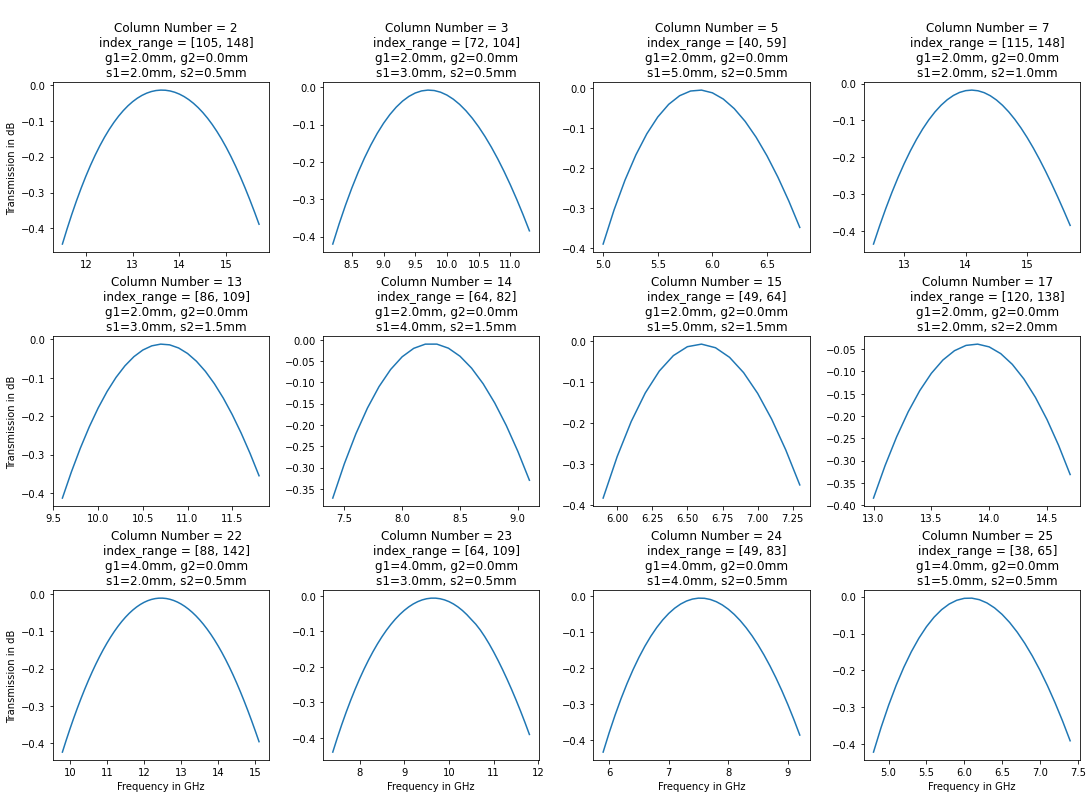

In [11]:
rows = 3
columns = 4
fig, window =  plt.subplots(rows, columns, figsize=(15,10))
fig.tight_layout()
for x in range(0,rows):
    for y in range(0, columns):
        position = x*columns+y
        column_index = indices[position]
        start = index_range[position][0]
        end = index_range[position][1]
        params=input_data[position]
        #print(start, end)
        window[x][y].plot(data.iloc[start:end, 0], data.iloc[start:end, column_index])
        window[x][y].title.set_text('''
        Column Number = %d
        index_range = [%d, %d]
        g1=%.1fmm, g2=%.1fmm
        s1=%.1fmm, s2=%.1fmm''' 
        % (column_index, start, end, *params))
plt.subplots_adjust(wspace=0.25, hspace=0.5)
plt.setp(window[-1, :], xlabel='Frequency in GHz');
plt.setp(window[:, 0], ylabel='Transmission in dB');

In [12]:
cleaned_data = np.concatenate((input_data, output_data), axis=1)
cleaned_data = pd.DataFrame(cleaned_data, columns=['g1 (mm)', 'g2 (mm)',
                                                   's1 (mm)', 's2 (mm)', 
                                                   'freq1 (GHz)', 'freq2 (GHz)'])
cleaned_data

,g1 (mm),g2 (mm),s1 (mm),s2 (mm),freq1 (GHz),freq2 (GHz)
0,2.0,0.0,2.0,0.5,11.5,15.8
1,2.0,0.0,3.0,0.5,8.2,11.4
2,2.0,0.0,5.0,0.5,5.0,6.9
3,2.0,0.0,2.0,1.0,12.5,15.8
4,2.0,0.0,3.0,1.5,9.6,11.9
...,...,...,...,...,...,...
324,8.0,2.0,4.0,1.5,5.6,8.3
325,8.0,2.0,1.0,2.0,8.2,10.5
326,8.0,2.0,2.0,2.0,7.3,9.7
327,8.0,2.0,4.0,2.0,5.7,8.2


In [13]:
cleaned_data.to_excel("Design1a_Para2_S21_cleaned.xlsx")  